In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import ResNet50, VGG16
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/X_train.npy')
X_val = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/X_val.npy')
X_test = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/X_test.npy')
y_train = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/y_train.npy')
y_val = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/y_val.npy')
y_test = np.load('/content/drive/MyDrive/MLHC_preprocessed_data/y_test.npy')

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')
])

es = EarlyStopping(monitor='val_accuracy', patience=30)
chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 flatten_8 (Flatten)         (None, 100352)           

In [ ]:
# Train the model
history = model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_data=(X_val, y_val),
          callbacks=[es, chkpt])

Epoch 1/100
120/120 [==============================] - 4s 20ms/step - loss: 1.0470 - accuracy: 0.4888 - val_loss: 0.9763 - val_accuracy: 0.5031
Epoch 2/100
120/120 [==============================] - 2s 18ms/step - loss: 0.9348 - accuracy: 0.5529 - val_loss: 0.8628 - val_accuracy: 0.5906
Epoch 3/100
120/120 [==============================] - 2s 18ms/step - loss: 0.7974 - accuracy: 0.6380 - val_loss: 0.7170 - val_accuracy: 0.6789
Epoch 4/100
120/120 [==============================] - 2s 17ms/step - loss: 0.6156 - accuracy: 0.7370 - val_loss: 0.5373 - val_accuracy: 0.7781
Epoch 5/100
120/120 [==============================] - 2s 17ms/step - loss: 0.4163 - accuracy: 0.8242 - val_loss: 0.3415 - val_accuracy: 0.8742
Epoch 6/100
120/120 [==============================] - 2s 18ms/step - loss: 0.2644 - accuracy: 0.9016 - val_loss: 0.2962 - val_accuracy: 0.8961
Epoch 7/100
120/120 [==============================] - 2s 18ms/step - loss: 0.1720 - accuracy: 0.9388 - val_loss: 0.1569 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Evolution')

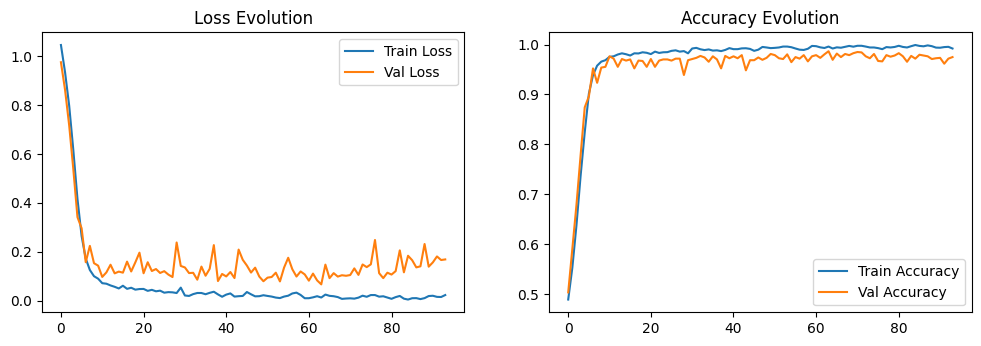

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

40/40 [==============================] - 0s 5ms/step - loss: 0.1886 - accuracy: 0.9711
Test loss: 0.1886
Test accuracy: 0.9711
